## Vector-valued function with Random Fourier Features

### Imports

In [36]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [37]:

dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 1000 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = np.array(np.ravel([y1, y2], 'F'))
"""
y = []
for i in range(n):
    y.append(y1[i])
    y.append(y2[i])

y = np.array(y)
"""

lam = 0.000001 # Regularization parameter

### Gaussian Kernel

In [38]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)

#### Alpha

In [39]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[  12548.81503321,  -22542.2153195 ,   -1567.71703882, ...,
          60243.49180399,   13245.46772243,  -92928.06186685],
       [  10055.24005923,  -14074.45621607,   -5338.2514408 , ...,
          72747.24449365,    9291.25207859, -111783.16093535]])

#### Estimated function

In [40]:
def estiamted_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estiamted_function(alpha_, x_vector, n, dimension)
func

array([[1.03607766, 0.99740292, 1.30991243, ..., 1.69638153, 1.38100716,
        1.40900245],
       [1.61207058, 1.00824956, 1.711668  , ..., 0.92587632, 1.72998327,
        2.25804218]])

#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_3252\2062984262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_3252\2062984262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


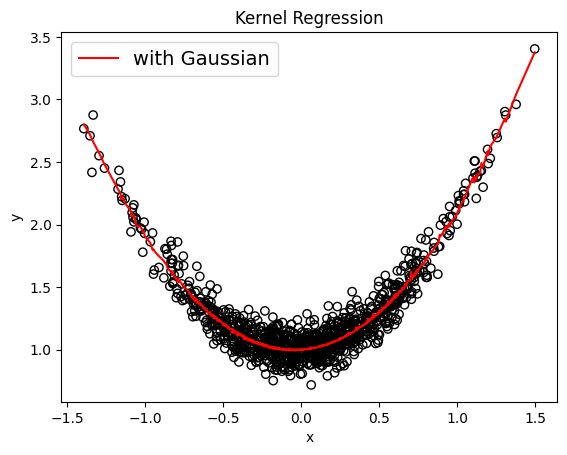

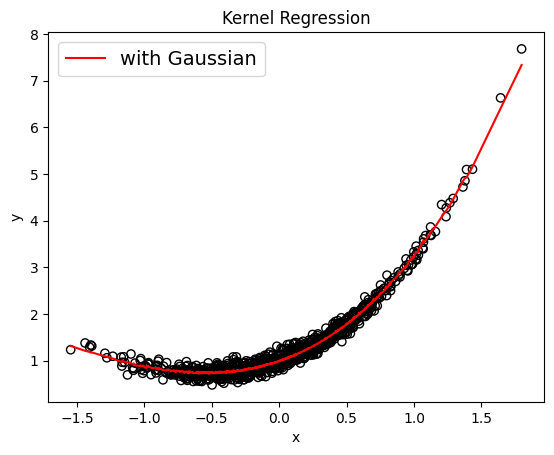

In [41]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [42]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[ 1.03113973,  0.        , -1.26700113, -0.        , -1.24485372,
        -0.        ,  1.41364165,  0.        ,  1.41383803,  0.        ,
         0.84064571,  0.        ,  0.49551474,  0.        ,  1.32249499,
         0.        , -1.24061253, -0.        ,  0.38314096,  0.        ,
        -1.06735693, -0.        , -0.65491572, -0.        , -0.2452265 ,
        -0.        ,  1.03983169,  0.        ,  1.26313173,  0.        ,
         0.065802  ,  0.        , -0.39147505, -0.        ,  1.37377627,
         0.        , -0.39927977, -0.        ,  0.85456747,  0.        ],
       [ 0.        ,  1.03113973, -0.        , -1.26700113, -0.        ,
        -1.24485372,  0.        ,  1.41364165,  0.        ,  1.41383803,
         0.        ,  0.84064571,  0.        ,  0.49551474,  0.        ,
         1.32249499, -0.        , -1.24061253,  0.        ,  0.38314096,
        -0.        , -1.06735693, -0.        , -0.65491572, -0.        ,
        -0.2452265 ,  0.        ,  1.03983169,  0.

#### Phi

In [43]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[ 1.09031975,  0.        , -1.26206552, ..., -0.        ,
         0.84340002,  0.        ],
       [ 0.        ,  1.09031975, -0.        , ..., -0.44213779,
         0.        ,  0.84340002],
       [ 1.03113973,  0.        , -1.26700113, ..., -0.        ,
         0.85456747,  0.        ],
       ...,
       [ 0.        ,  1.11726851, -0.        , ..., -0.44049455,
         0.        ,  0.82481591],
       [ 1.14194013,  0.        , -1.22984312, ..., -0.        ,
         0.82236617,  0.        ],
       [ 0.        ,  1.14194013, -0.        , ..., -0.46456536,
         0.        ,  0.82236617]])

#### Alpha

In [44]:
def alpha_approx(phi, y, n, dim, m, lam):
    alpha = np.linalg.inv(phi.T @ phi + lam*np.eye(dim*m)) @ (phi.T@y)
    return alpha

alpha_approximation = alpha_approx(phi_, y, n, dimension, m, lam)

#### Function Approximation

In [45]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)
function_estimate

array([[1.03622495, 0.99788874, 1.30973905, ..., 1.69560635, 1.38076301,
        1.4085655 ],
       [1.60999649, 1.00819213, 1.70934709, ..., 0.92237191, 1.72792774,
        2.25821523]])

#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_3252\2328763344.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_3252\2328763344.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


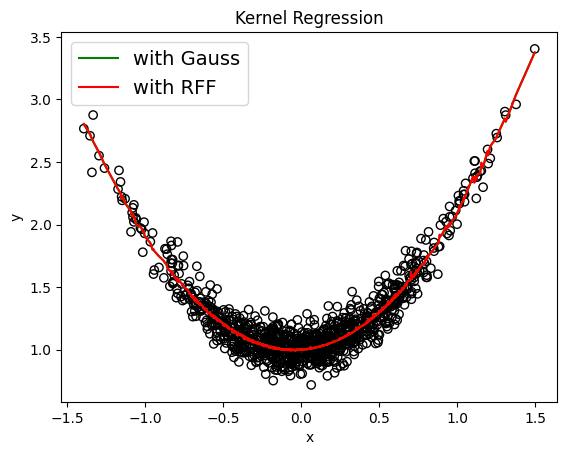

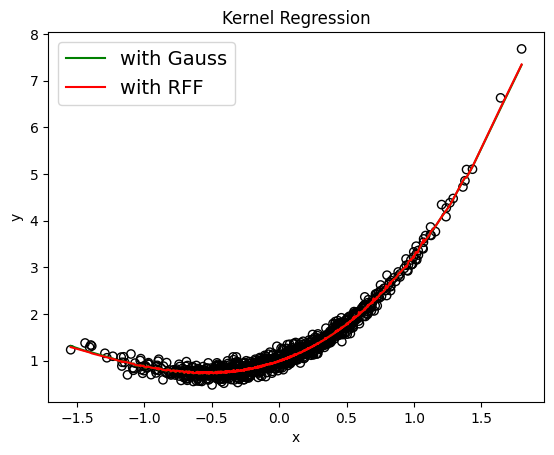

In [46]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="g", label="with Gauss")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="g", label="with Gauss")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()